# Introduction

Zuber is a new ride-sharing company launching in Chicago. The goal of this project is to find patterns in the available data to understand rider preferences and the impact of external factors on trips.

# Data description

project_sql_result_01.csv. Contains the following data:

- company_name: name of the taxi company
- trips_amount: the number of trips for each taxi company on November 15 and 16, 2017.

project_sql_result_04.csv. Contains the following data:

- dropoff_location_name — Chicago neighborhoods where trips ended
- average_trips — The average number of trips that ended in each neighborhood in November 2017.

project_sql_result_07.csv — Contains data on trips from the Loop to O'Hare International Airport

- start_ts — Date and time of pickup
- weather_conditions — Weather conditions at the time the trip started
- duration_seconds — Trip duration in seconds

## Initialization and data loading

In [1]:
# Loading libraries required 
import pandas as pd #Pandas library for dataset creation and manipulation
import numpy as np #Numpy library for scientific computing functions
import seaborn as sns #Seaborn library for box-and-whisker plot visualization
from matplotlib import pyplot as plt #Pyplot for graph visualization
from scipy import stats as st # Scipy initialization for statistical functions

In [2]:
# Loading first file and parsing its information
df_company_trips = pd.read_csv('moved_project_sql_result_01.csv')
df_company_trips.info()
print()
print(df_company_trips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


**Remarks:** The dataframe df_company_trips contains appropriate data types for both of its columns, it does not contain any missing values.

In [3]:
# Loading second file and parsing its information
df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
df_neighborhoods.info()
print()
print(df_neighborhoods.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


**Remarks:** The dataframe df neighborhoods contains suitable data types for both of its columns, it does not contain any missing values.

In [4]:
# Loading third file and parsing its information
df_loop_air_trips = pd.read_csv('moved_project_sql_result_07.csv')
df_loop_air_trips.info()
print()
print(df_loop_air_trips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


**Remarks:** The dataframe df_loop_air_trips does not contain missing values, however the start_ts field must be modified to Date type, since it comes as object type.

## Data preparation

In [5]:
#CONVERTING start_ts FIELD FROM df_loop_air_trips TO DATE
df_loop_air_trips['start_ts'] = pd.to_datetime(df_loop_air_trips['start_ts'], format="%Y-%m-%d %H:%M:%S")
#Verifying conversion
df_loop_air_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [6]:
#CHECKING DUPLICATE VALUES
print("Duplicate values in df_company_trips: ", df_company_trips[df_company_trips.duplicated()])
print("Duplicate values in df_neighborhoods: ", df_neighborhoods[df_neighborhoods.duplicated()])
print()
print("Duplicate values in df_loop_air_trips: ", df_loop_air_trips[df_loop_air_trips.duplicated()])
print("Number of duplicate values in df_loop_air_trips: ", df_loop_air_trips.duplicated().sum())

Duplicate values in df_company_trips:  Empty DataFrame
Columns: [company_name, trips_amount]
Index: []
Duplicate values in df_neighborhoods:  Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []

Duplicate values in df_loop_air_trips:                  start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

**Remarks:**
- Changed the data type of the start_ts column in df_loop_air_trips to datetime format
- Dataframes df_company_trips and df_neighborhoods do not contain duplicate values
- Dataframe df_loop_air_trips contains 197 duplicate values, however, since it includes data about trips from different taxi companies with rounded times and durations, it is easy to find multiple trips to the same address, at the same date and time and naturally with the same weather conditions, duplicate values will not be removed.

## Analysis

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


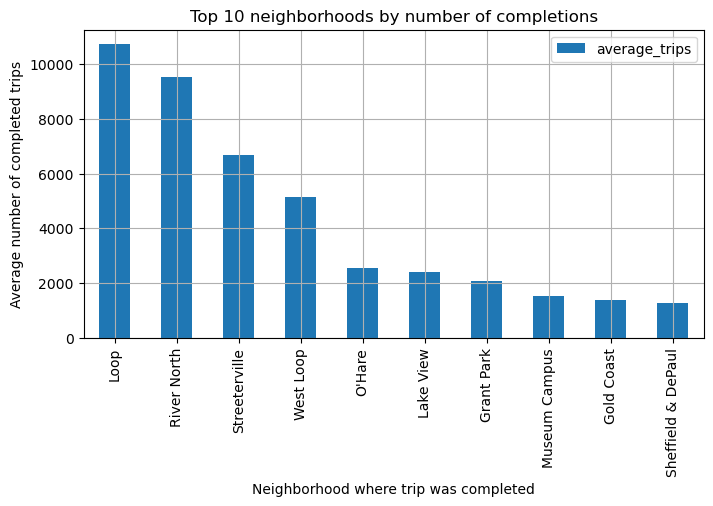

In [7]:
#Getting the top 10 neighborhoods by average trip completions
top_10_drop_neighborhoods = df_neighborhoods.sort_values(by = 'average_trips', ascending = False).head(10)
print(top_10_drop_neighborhoods)

#Creating a graph for the top 10 neighborhoods by number of completions
top_10_drop_neighborhoods.plot(
    kind='bar',
    x = "dropoff_location_name",
    xlabel="Neighborhood where trip was completed",
    ylabel='Average number of completed trips',
    figsize=[8, 4],
    title='Top 10 neighborhoods by number of completions',
    grid=True)
plt.show()

**Remarks:**
The main travel destinations are addresses in the following neighborhoods:
1.                  Loop   10727.466667
2.           River North    9523.666667
3.         Streeterville    6664.666667
4.             West Loop    5163.666667

All of them exceed 5,000 completed trips on average, a number that is considerably higher than the following 6 neighborhoods in the top 10 list, whose average completion rate is between 1,000 and 3,000 trips:

5.                O'Hare    2546.900000
6.             Lake View    2420.966667
7.            Grant Park    2068.533333
8.         Museum Campus    1510.000000
9.            Gold Coast    1364.233333
10.   Sheffield & DePaul    1259.766667

                            company_name  trips_amount
0                              Flash Cab         19558
1              Taxi Affiliation Services         11422
2                       Medallion Leasin         10367
3                             Yellow Cab          9888
4        Taxi Affiliation Service Yellow          9299
5              Chicago Carriage Cab Corp          9181
6                           City Service          8448
7                               Sun Taxi          7701
8              Star North Management LLC          7455
9      Blue Ribbon Taxi Association Inc.          5953
10               Choice Taxi Association          5015
11                            Globe Taxi          4383
12             Dispatch Taxi Affiliation          3355
13             Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Associat          2235
15              Checker Taxi Affiliation          2216
16                          Blue Diamond          2070
17        

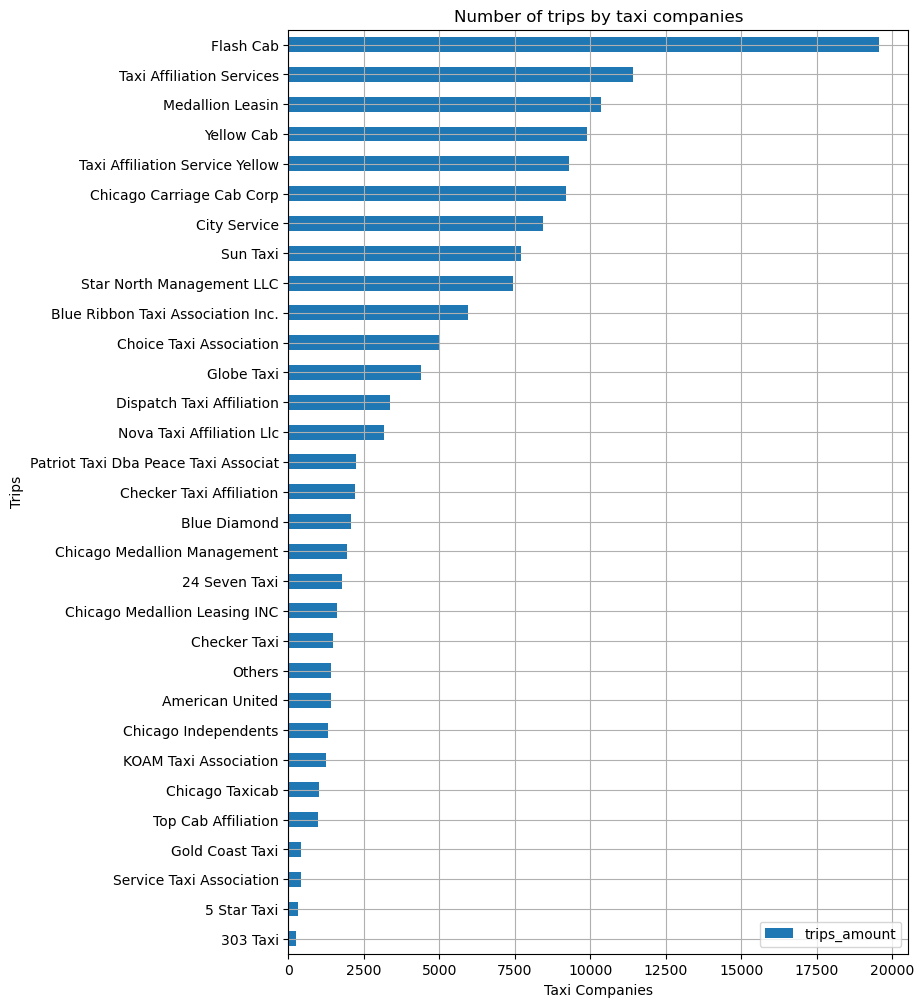

In [8]:
#Getting the top 30 companies by number of trips
top_30_companies = df_company_trips.sort_values(by = 'trips_amount', ascending = False).head(30)

#Calculating the sum of the remaining 30 companies (not belonging to the top 30)
others = df_company_trips.sort_values(by='trips_amount', ascending=False).iloc[30:]
sum_others = others['trips_amount'].sum()

# Adding a record with the "Other" companies
new_record_others = pd.DataFrame({'company_name': ['Others'], 'trips_amount': [sum_others]})
top_30_companies = pd.concat([top_30_companies, new_record_others], ignore_index=True)
print(top_30_companies)

# Sorting the DataFrame in ascending order
top_30_companies = top_30_companies.sort_values(by='trips_amount', ascending=True)

#Creating graph for taxi companies and their number of trips
top_30_companies.plot(
    kind='barh', 
    x = "company_name",
    y = "trips_amount",
    xlabel="Taxi Companies", 
    ylabel='Trips', 
    figsize=[8, 12],
    title='Number of trips by taxi companies', 
    grid=True)
plt.show()

**Remarks:**
The chart shows that taxi company Flash Cab clearly dominates the market with 19,558 trips, well ahead of the second largest company, Taxi Affiliation Services, which performed 11,422 trips. There is a marked decline in the number of trips as you move down the list, with several companies performing fewer than 2,000 trips. This indicates that the market is highly concentrated in a few major companies, while many others operate on a much smaller scale. The “Other” companies, which are not individually in the top 30, collectively account for only 1,426 trips, reinforcing the dominance of the major companies on the list.

In [9]:
# *** Testing Hypothesis ***
"""
    H0: Average trip duration from the Loop to O'Hare International Airport does NOT change on rainy days
    H1: Average trip duration from the Loop to O'Hare International Airport does change on rainy days
"""

#A test will be done to compare the changes in the mean between Good and Bad weather conditions
#(All records in df_loop_air_trips correspond to trips on Saturday)
good_weather = df_loop_air_trips.query("weather_conditions == 'Good'")
bad_weather = df_loop_air_trips.query("weather_conditions == 'Bad'")

alpha = 0.05
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the duration of trips is indeed influenced by bad weather.")
else:
    print("We cannot reject the null hypothesis, there is no relevant difference in the duration of trips.")

p-value:  6.517970327099473e-12
We reject the null hypothesis, the duration of trips is indeed influenced by bad weather.


**Remarks:**
- The null hypothesis was defined as the equality in the average duration of trips on days with "Good" and "Bad" weather respectively, the alternative hypothesis was defined as the difference in the average duration of the same.
- A t test will be used to test the hypothesis, since it requires an evaluation of the difference statistics resulting from the comparison of the means of two samples of the population.

## Conclusion

The analysis of ride-sharing data in Chicago reveals key insights into customer behavior and the impact of external factors on trips. The most popular travel destinations are concentrated in four key neighborhoods—Loop, River North, Streeterville, and West Loop—each averaging over 5,000 completed trips. This suggests that the majority of ride-sharing demand is centered around business, entertainment, and residential hubs.

Additionally, the market is highly concentrated, with a few major taxi companies, such as Flash Cab and Taxi Affiliation Services, dominating the number of trips. In contrast, many smaller companies operate on a significantly smaller scale, highlighting a competitive imbalance in the industry.

External factors, particularly weather conditions, play a significant role in trip durations. A hypothesis test confirmed that trips from the Loop to O’Hare International Airport take longer on rainy days, demonstrating the impact of bad weather on travel time. These findings suggest that optimizing ride availability and pricing based on weather conditions and high-demand areas could improve service efficiency and customer satisfaction.